In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

Exploratory Precipitation Analysis

In [9]:
# Find the most recent data in the data set.
most_recent = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(most_recent)

('2017-08-23',)


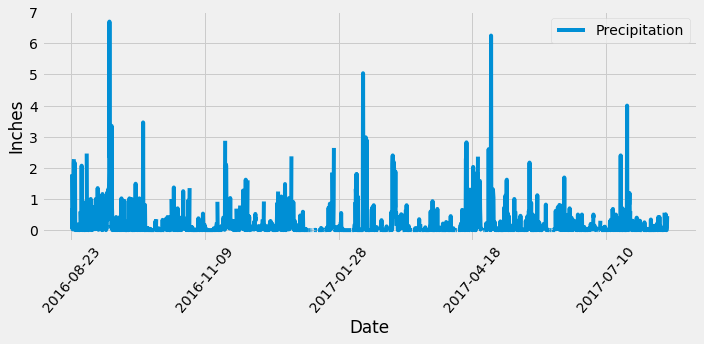

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the data one year from the last date in data set.
one_year_from_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
                                filter(Measurement.date >= one_year_from_date).all()

# Save the query results as a Pandas DataFrame. Expicityly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns= ['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
precipitation_scores_df = precipitation_scores_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores_df.plot(figsize=(10,5), rot=50)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(total_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        filter(Measurement.station=='USC00519281').all()
print(most_active_station)

[(54.0, 85.0, 71.66378066378067)]


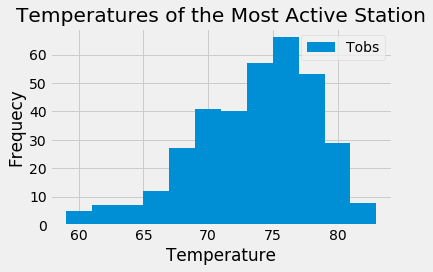

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temps = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
                            filter(Measurement.date >= one_year_from_date).all()


temperatures_df = pd.DataFrame(active_station_temps)

temperatures_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequecy")
plt.title("Temperatures of the Most Active Station")
plt.legend(["Tobs"])
plt.tight_layout()
plt.show()
                                                                              

Close Session

In [47]:
# Close Session 
session.close()